# Genetic Programming 

some basic examples on how genetic programming works

## 1. Maximizing a Univariate Function

In [26]:
import random, math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

In [27]:
def generate_binary_string(n):
  binary_string=""
  for i in range(n):
    r_ = random.random()
    #print(r_, binary_string)
    if r_ >=0.5:
      binary_string+="1"
    else:
      binary_string +="0"
  return binary_string

In [28]:
def do_selection(fitness_tuples):
  return [i[0] for i in sorted(fitness_tuples, key=lambda x:x[1], reverse = True)[:len(fitness_tuples)//2]]

In [29]:
def do_crossover(parents):
  offsprings = []
  for index_parent in range(0, len(parents)-1, 2):
    index_crossover = random.randint(0, len(parents[index_parent])-1)
    #print(index_crossover)
    offsprings.append(parents[index_parent][:index_crossover+1] 
                      + parents[index_parent+1][index_crossover+1:])
    offsprings.append(parents[index_parent+1][:index_crossover+1] 
                      + parents[index_parent][index_crossover+1:])
  return offsprings
    

In [30]:
def do_mutation(offsprings):
  prob_mutation = 1/len(offsprings[0])
  #print(prob_mutation)
  mutants = []
  for o in offsprings:
    #print(o, "-")
    mutated_o = ""
    for bit in o:
      coin_flip = random.random()
      if coin_flip<prob_mutation:
        if bit == "0":
          mutated_o += "1"
        else:
          mutated_o += "0"
      else:
        mutated_o += bit
    #print(mutated_o)
    mutants.append(mutated_o)
  return mutants
      

In [31]:
def calculate_fitness(x):
  return math.pow(int(x, 2), 2)

In [34]:
num_generations = 100
size_population = 8
size_members = 12

track_max = []
track_average = []

str_fitness_pairs = []
for i in range(size_population):
  bin_str = generate_binary_string(size_members)
  fitness = calculate_fitness(bin_str)
  str_fitness_pairs.append((bin_str, fitness))
#print(str_fitness_pairs)



for i in range(num_generations):
  #print(str_fitness)
  track_max.append(max([i[1] for i in str_fitness_pairs]))
  track_average.append(sum([i[1] for i in str_fitness_pairs])/len(str_fitness_pairs))
  parents = do_selection(str_fitness_pairs)
  offsprings = do_crossover(parents)
  mutants = do_mutation(offsprings)
  #print(parents, "--", offsprings, "--", mutants)
  new_pairs = []
  for i in parents + mutants:
    new_pairs.append((i, calculate_fitness(i)))
  str_fitness_pairs = new_pairs

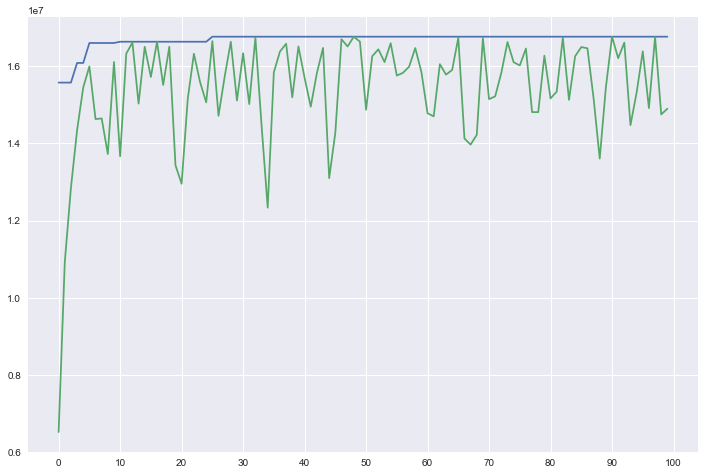

In [35]:
plt.figure(figsize = (12, 8))
plt.plot(track_max)
plt.plot(track_average)
plt.xticks(range(0, len(track_max)+1, 10), range(0, len(track_max)+1, 10))
plt.show()